# Exercise ploynomial regression

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
tip_data = sns.load_dataset("tips")
print(tip_data.describe())
print(tip_data.info())
tip_data["tip"].describe()

       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB
None


count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64

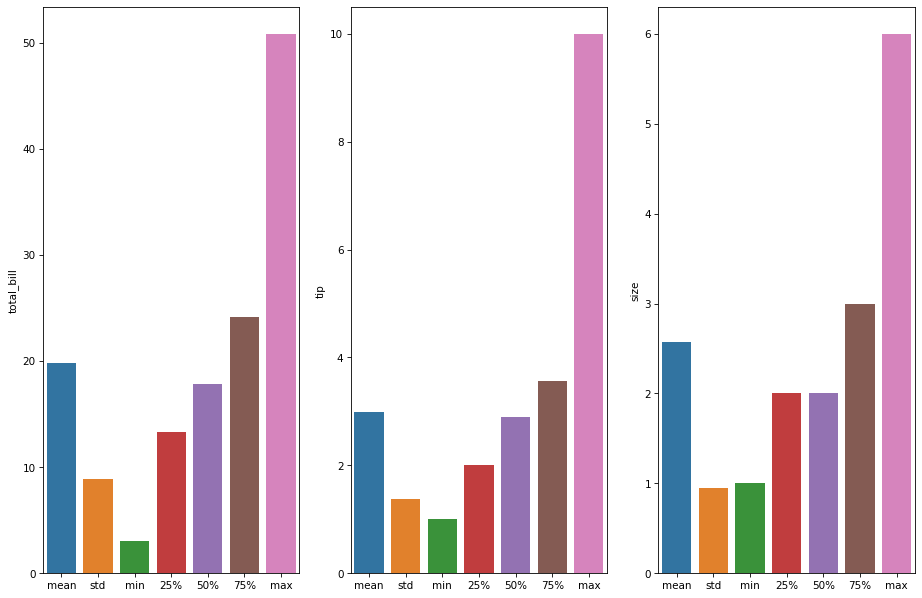

In [3]:
# Interseting data total_bill/tip/sex/day/time
fig, ax = plt.subplots(1, 3, figsize = (15,10), dpi=75)

for i, feature in enumerate(["total_bill", "tip", "size"]):
    sns.barplot(data=tip_data, x=tip_data[feature].describe().drop("count").index ,y=tip_data[feature].describe().drop("count"), ax=ax[i])

<AxesSubplot:xlabel='size', ylabel='tip'>

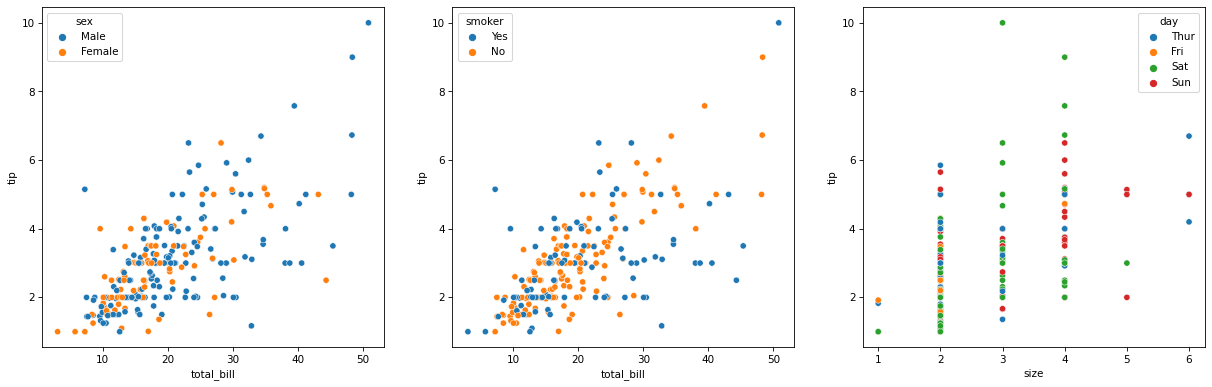

In [16]:
fig, ax = plt.subplots(1, 3, figsize=(20, 6), dpi=75)
sns.scatterplot(data=tip_data, x = "total_bill", y = "tip", ax=ax[0], hue="sex")
sns.scatterplot(data=tip_data, x = "total_bill", y = "tip", ax=ax[1], hue="smoker")
sns.scatterplot(data=tip_data, x = "size", y = "tip", ax=ax[2], hue="day")